# SciPy Introduction

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as opt

## Global Minimum and Maximum

In [4]:
def f(x):
    return x**2 + 10*np.sin(x) + 2*x

In [5]:
x = np.linspace(-10,10,51)

In [6]:
y = f(x)

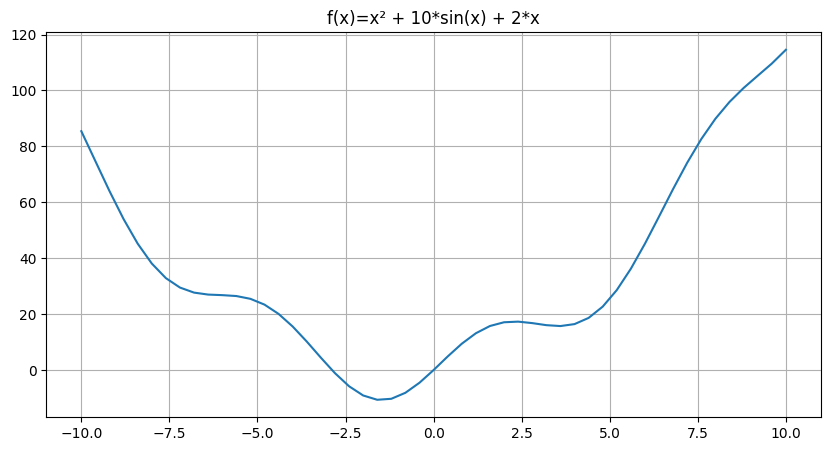

In [44]:
fig = plt.figure(figsize=(10,5))

plt.plot(x,y)

plt.title('f(x)=x² + 10*sin(x) + 2*x')
plt.grid()

fig.savefig('assets/SciPy_Introduction_00.webp', bbox_inches='tight')

![SciPy Introduction](assets/SciPy_Introduction_00.webp)

### BFGS (Broyden-Fletcher-Goldfarb-Shanno Algorithm)

In [62]:
# start searching for a local minimum at x0=0
x0 = 0

In [63]:
# use BFGS (Broyden-Fletcher-Goldfarb-Shanno Algorithm)
[xopt, fopt, gopt, Bodpt, func_calls, grad_calls, warnflags] = opt.fmin_bfgs(
    f, x0=x0,
    maxiter=2000,
    full_output=True
)

Optimization terminated successfully.
         Current function value: -10.728527
         Iterations: 5
         Function evaluations: 12
         Gradient evaluations: 6


```
Optimization terminated successfully.
         Current function value: -10.728527
         Iterations: 5
         Function evaluations: 12
         Gradient evaluations: 6
```

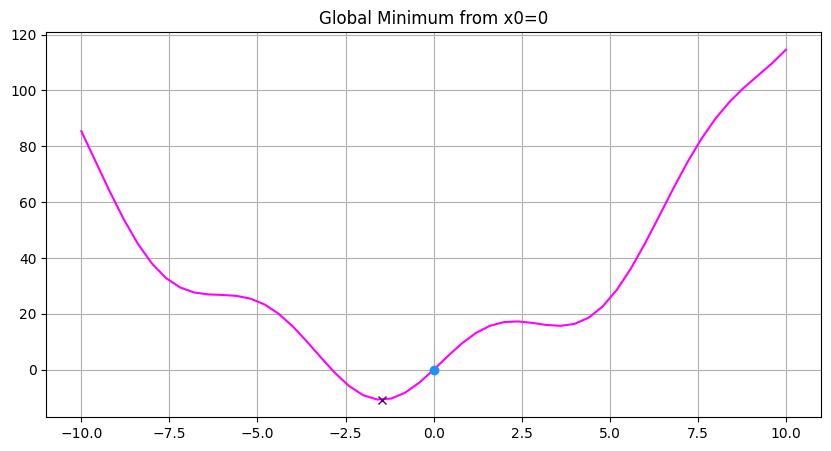

In [64]:
fig = plt.figure(figsize=(10,5))

plt.plot(x,y, c='fuchsia')
# start point f(x) = -10.728527
plt.plot([x0], [f(x0)], 'o', c='dodgerblue')
# found minimum @[xopt, fopt]
plt.plot([xopt], [fopt], 'x', c='indigo')
plt.title('Global Minimum from x0=0')
plt.grid()

fig.savefig('assets/SciPy_Introduction_01.webp', bbox_inches='tight')

![SciPy Introduction](assets/SciPy_Introduction_01.webp)

Optimization terminated successfully.
         Current function value: 15.730518
         Iterations: 5
         Function evaluations: 22
         Gradient evaluations: 11


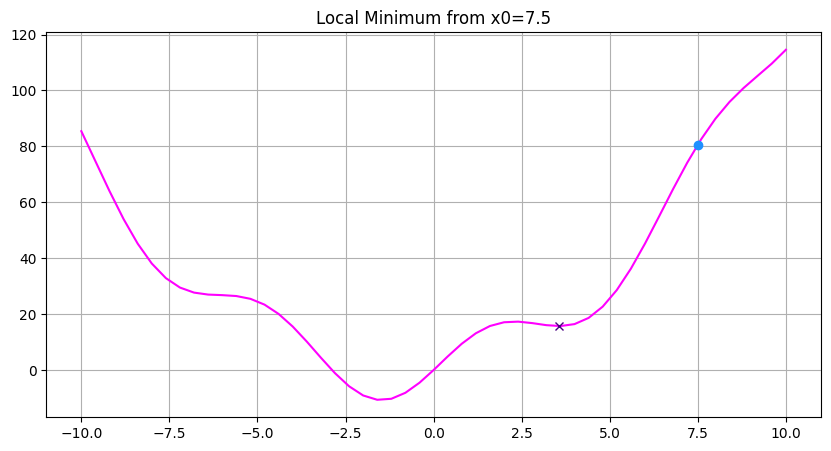

In [47]:
# start searching for a local minimum at x0=7.5
x0 = 7.5

# use BFGS (Broyden-Fletcher-Goldfarb-Shanno Algorithm)
[xopt, fopt, gopt, Bodpt, func_calls, grad_calls, warnflags] = opt.fmin_bfgs(
    f, x0=x0,
    maxiter=2000,
    full_output=True
)

fig = plt.figure(figsize=(10,5))

plt.plot(x,y, c='fuchsia')
# start point [x0, f(x0)]
plt.plot([x0], [f(x0)], 'o', c='dodgerblue')
# found minimum @[xopt, fopt]
plt.plot([xopt], [fopt], 'x', c='indigo')
plt.title('Local Minimum from x0=7.5')
plt.grid()

fig.savefig('assets/SciPy_Introduction_02.webp', bbox_inches='tight')

The algorithm stops searching for a global minimum after finding the first local minimum:

```
Optimization terminated successfully.
         Current function value: 15.730518
         Iterations: 5
         Function evaluations: 22
         Gradient evaluations: 11
```

![SciPy Introduction](assets/SciPy_Introduction_02.webp)

###  Basin-Hopping Algorithm

In [58]:
# start searching for a local minimum at x0=7.5
x0 = 7.5

# the bh algo requiers a max number of jumps it should perform niter
# and a temperature parameter T that allows for larger jumps to be able
# to hop over local minimums with a maximum step size of stepsize
results = opt.basinhopping(f, x0 = x0, niter=3, T=1, stepsize=2)
results

                        fun: 15.730518126848704
 lowest_optimization_result:       fun: 15.730518126848704
 hess_inv: array([[0.16402422]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 14
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([3.56285907])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 58
                        nit: 3
                       njev: 29
                    success: True
                          x: array([3.56285907])

```
                        fun: -10.728527164657866
 lowest_optimization_result:       fun: -10.728527164657866
 hess_inv: array([[0.08364616]])
      jac: array([-2.38418579e-07])
  message: 'Optimization terminated successfully.'
     nfev: 10
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([-1.47554364])
                    message: ['requested number of basinhopping iterations completed successfully']
      minimization_failures: 0
                       nfev: 64
                        nit: 3
                       njev: 32
                    success: True
                          x: array([-1.47554364])
```

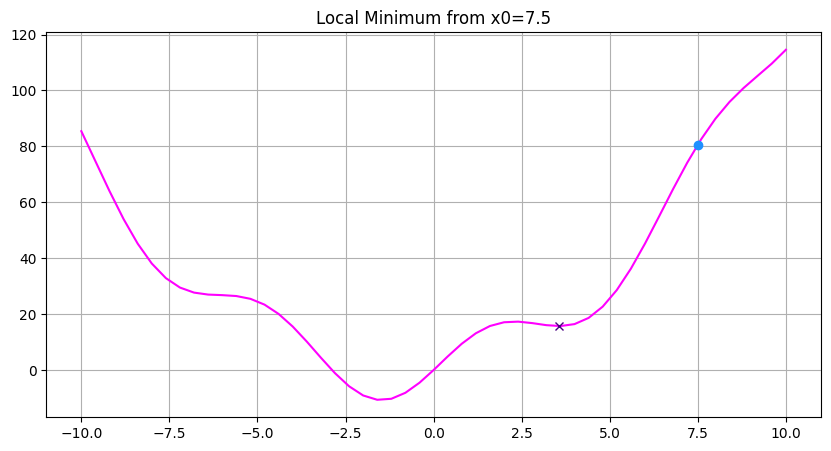

In [59]:
fig = plt.figure(figsize=(10,5))

plt.plot(x,y, c='fuchsia')
# start point [x0, f(x0)]
plt.plot([x0], [f(x0)], 'o', c='dodgerblue')
# found minimum @[xopt, fopt]
plt.plot([results.x], [results.fun], 'x', c='indigo')
plt.title('Local Minimum from x0=7.5')
plt.grid()

fig.savefig('assets/SciPy_Introduction_03.webp', bbox_inches='tight')

![SciPy Introduction](assets/SciPy_Introduction_03.webp)

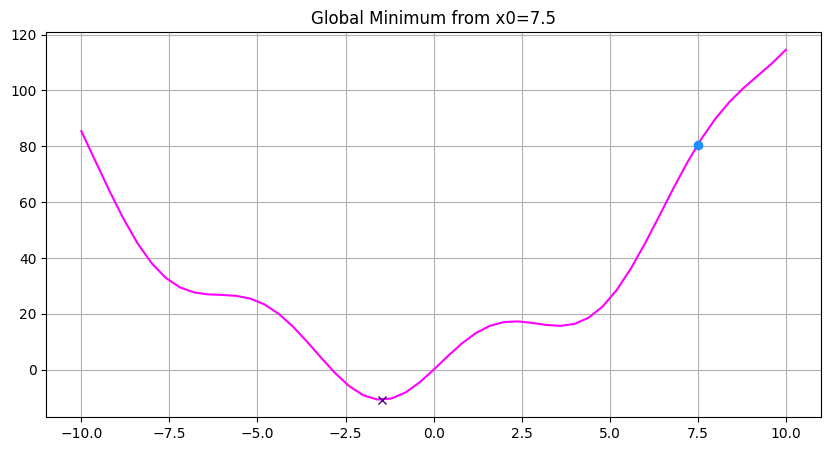

In [8]:
# start searching for a local minimum at x0=7.5
x0 = 7.5

# increase temperature and max allowed stepsize to 3
results = opt.basinhopping(f, x0 = x0, niter=3, T=2, stepsize=3)

fig = plt.figure(figsize=(10,5))

plt.plot(x,y, c='fuchsia')
# start point [x0, f(x0)]
plt.plot([x0], [f(x0)], 'o', c='dodgerblue')
# found minimum @[xopt, fopt]
plt.plot([results.x], [results.fun], 'x', c='indigo')
plt.title('Global Minimum from x0=7.5')
plt.grid()

fig.savefig('assets/SciPy_Introduction_04.webp', bbox_inches='tight')

![SciPy Introduction](assets/SciPy_Introduction_04.webp)

## Curve Fitting

In [7]:
# generate noisy data based on function above
y_noisy = f(x) + 7*np.random.randn(x.size)

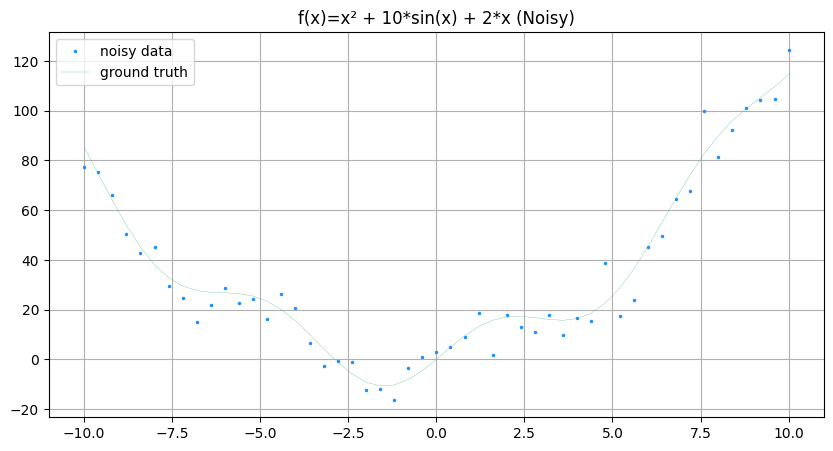

In [17]:
fig = plt.figure(figsize=(10,5))

plt.plot(x,y_noisy, 'o', c='dodgerblue', markersize=1.5, label='noisy data')
plt.plot(x,y, c='mediumseagreen', linewidth=0.2, label='ground truth')

plt.title('f(x)=x² + 10*sin(x) + 2*x (Noisy)')
plt.legend()
plt.grid()

fig.savefig('assets/SciPy_Introduction_05.webp', bbox_inches='tight')

![SciPy Introduction](assets/SciPy_Introduction_05.webp)

In [9]:
# find optimum for variables in f(x)=ax² + b*sin(x) + c*x
# to find a best fit to noisy data
def f_guess(x, a, b, c):
    return a*x**2 + b*np.sin(x) + c*x

In [10]:
# start guessing with a to c = 2
start_values = [2,2,2]

params, cov = opt.curve_fit(f_guess, x, y_noisy, start_values)
params

array([0.97841916, 9.5859976 , 2.09289098])

`array([ 0.97651997, 10.38400783,  2.06441947])`

In [13]:
def f_fitted(x, a_fit, b_fit, c_fit):
    return a_fit * x**2 + b_fit * np.sin(x) + c_fit * x

y_fitted=f_fitted(
    x,
    a_fit=params[0],
    b_fit=params[1],
    c_fit=params[2]
)

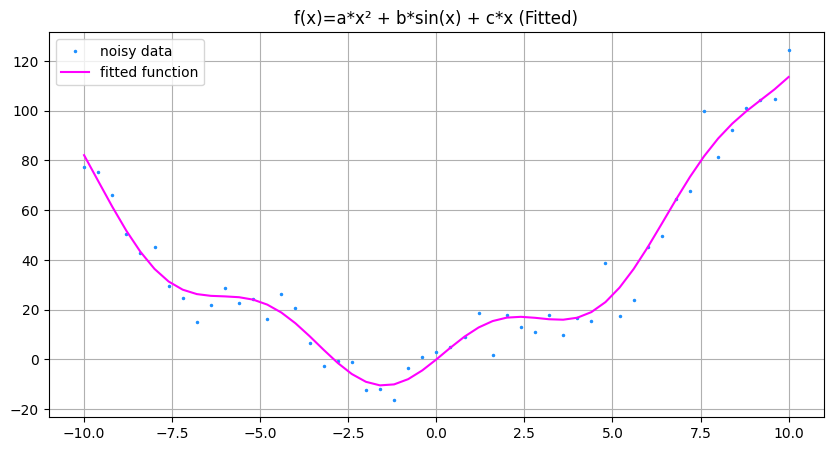

In [15]:
fig = plt.figure(figsize=(10,5))

plt.plot(x,y_noisy, 'o', c='dodgerblue', markersize=1.5, label='noisy data')
plt.plot(x,y_fitted, c='fuchsia', linewidth=1.5, label='fitted function')

plt.title('f(x)=a*x² + b*sin(x) + c*x (Fitted)')
plt.legend()
plt.grid()

fig.savefig('assets/SciPy_Introduction_06.webp', bbox_inches='tight')

![SciPy Introduction](assets/SciPy_Introduction_06.webp)